<a href="https://colab.research.google.com/github/OliverRevilla/Data-Analysis-with-Python/blob/main/Querys_graphs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
np.random.seed(2020)
datos = np.random.randn(10,4)
datos.shape

(10, 4)

BoxPlots

**BOXPLOTS**

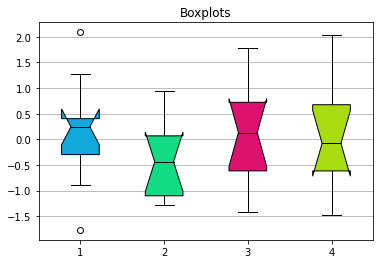

In [ ]:
colors = ['pink','blue','yellow','red']
bplot1 = plt.boxplot(datos, vert = True, notch= True, patch_artist= True)
plt.title('Boxplots')

# Color a las propiedades
for element in ['boxes', 'whiskers', 'fliers', 'means', 'medians', 'caps']:
  plt.setp(bplot1[element], color='black')

# Color a las cajas
colors = ['#11A8DC','#11DC83','#DC1170','#A8DC11']
for patch,color in zip(bplot1['boxes'],colors):
  patch.set_facecolor(color)  
plt.grid(axis = 'y') # o 'x' 
plt.show()
  

Principales estadísticos

In [ ]:
datos.mean()

-0.03816823333539909

In [ ]:
datos.mean(axis = 1)

array([-0.86883833, -0.5409643 ,  0.08698301, -0.26769018, -0.17206948,
        0.39261388, -1.04997016,  0.99285098,  0.26258069,  0.78282157])

In [ ]:
datos.mean(axis = 0)

array([ 0.15291522, -0.41988013,  0.10969863,  0.00459334])

In [ ]:
datos.std()

0.9772841905882709

**DataFrames**

In [ ]:
df = pd.DataFrame(datos)
type(df)
df

,0,1,2,3
0,-1.768846,0.075552,-1.130630,-0.651430
1,-0.893116,-1.274101,-0.061154,0.064514
2,0.410113,-0.572882,-0.801334,1.312035
3,1.274699,-1.214358,0.313719,-1.444821
4,-0.368961,-0.769227,0.392616,0.057294
5,2.089979,0.041971,-0.048341,-0.513154
6,-0.084589,-1.215450,-1.412931,-1.486911
7,0.382225,0.937673,1.772678,0.878828
8,0.331719,-0.306036,1.240266,-0.215627
9,0.155929,0.098056,0.832096,2.045205


In [ ]:
df.columns = ['Valores1','Valores2','Valores3','Valores4']
df.describe() # solo valores numéricos

,Valores1,Valores2,Valores3,Valores4
count,10.000000,10.000000,10.000000,10.000000
mean,0.152915,-0.419880,0.109699,0.004593
std,1.068615,0.724354,1.023511,1.140978
min,-1.768846,-1.274101,-1.412931,-1.486911
25%,-0.297868,-1.103075,-0.616289,-0.616861
50%,0.243824,-0.439459,0.132689,-0.079167
75%,0.403141,0.067157,0.722226,0.675249
max,2.089979,0.937673,1.772678,2.045205


In [ ]:
#Cálculo de deciles
np.percentile(df, np.arange(0,100,10))

array([-1.76884571, -1.28798395, -0.94061844, -0.59644679, -0.25179037,
       -0.00318471,  0.08455357,  0.34687084,  0.84144228,  1.27843251])

In [ ]:
#Estadísticos para una variable
medias = []
for i in df.columns:
  media = df[i].mean()
  medias.append(media)

medias

[0.15291522149441658,
 -0.41988012849739215,
 0.10969863349406599,
 0.004593340167313142]

In [ ]:
#Creación de listas
col1 = [1,2,3,4,5]
col2 = ['A','B','C','D','E']
col3 = [True,False,True,False,True]
lista_index = ['Id1','Id2','Id3','Id4','Id5']
#creación de un diccionario
df2 = pd.DataFrame({'Numeros': col1,
                   'Letras': col2,
                   'Validacion': col3}, index = lista_index)
df2

,Numeros,Letras,Validacion
Id1,1,A,True
Id2,2,B,False
Id3,3,C,True
Id4,4,D,False
Id5,5,E,True


In [ ]:
data = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vRo5Lsi4kqlP1Muiu9vKvUKS4__O4vzqbioeojVcCxGYjMqqbFPv10b9VGSWKD8oQ/pub?gid=732305239&single=true&output=csv')
data.head(3)

,FechaProgramacion,Fabrica,Seccion,Linea,Equipo,TiempoPNP
0,19/7/2018,Envases,Envasado Evaporada,Linea Baby 4,TRANSP CABLE ELEVADO ENFRIADOR,45
1,19/7/2018,Envases,Envasado Evaporada,Linea Baby 4,TRANSP CABLE ELEVADO CERRADORA,45
2,19/7/2018,Envases,Envasado Evaporada,Linea Baby 4,TABLERO AUTOMATISMO ESTERILIZADOR,45


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   FechaProgramacion  9999 non-null   object
 1   Fabrica            9999 non-null   object
 2   Seccion            9999 non-null   object
 3   Linea              9999 non-null   object
 4   Equipo             9999 non-null   object
 5   TiempoPNP          9999 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 468.8+ KB


In [ ]:
data.dtypes

FechaProgramacion    object
Fabrica              object
Seccion              object
Linea                object
Equipo               object
TiempoPNP             int64
dtype: object

In [ ]:
# Vaores únicos en cada columna
lista = []

for i in data.columns:
  if i != ('FechaProgramacion' or 'TiempoPNP'):
    unicos = data[i].unique()
    lista.append(unicos)
  
lista

[array(['Envases', 'Condenseria', 'Derivados'], dtype=object),
 array(['Envasado Evaporada', 'Envasado RTD'], dtype=object),
 array(['Linea Baby 4', 'Linea Baby 1', 'Linea Baby 3', 'Linea Baby 2',
        'Linea Baby 6', 'Linea Baby 7'], dtype=object),
 array(['TRANSP CABLE ELEVADO ENFRIADOR', 'TRANSP CABLE ELEVADO CERRADORA',
        'TABLERO AUTOMATISMO ESTERILIZADOR', 'ROBOT PALETIZADOR KUKA',
        'ETIQUETADORA', 'ESTERILIZADOR', 'ESPIRAL INGRESO ETIQUETADORA',
        'EMBALADORA NON SHOCK', 'ELEVADOR SALIDA ENFRIADOR',
        'DETECTOR RAYOS X INSCAN100', 'CODIFICADOR DE CAJAS MARSH',
        'VAC TRAC ENFRIADOR', 'TRANSP SALIDA ENFRIADOR',
        'TRANSP SALIDA CERRADORA', 'TRANSP MASS CONVEYOR',
        'TRANSP ALIMENTADOR ENVASES VACIO',
        'TRANSP ALIMENT CAJAS A PALETIZ', 'PRECALENTADOR', 'LLENADORA',
        'Llenado Y Embalado / Baby 4 - FLE', 'TRANSP SALIDA EMBALADORA',
        'TRANSP RODILLO PALETAS', 'TABLERO AUTOMATISMO LLEN-CERRADORA',
        'PALETIZADOR 

In [ ]:
data.Seccion.unique()

array(['Envasado Evaporada', 'Envasado RTD'], dtype=object)

**Funciones de agrupación**

In [ ]:
#Calcular los tiempos de parada por fábrica
total = data.groupby('Fabrica').agg({'TiempoPNP':['sum','mean','min','count']}).reset_index()
total

Fabrica TiempoPNP                      
                     sum        mean min count
0  Condenseria    253829   76.133473  10  3334
1    Derivados    340043  102.023102   5  3333
2      Envases    265488   79.678271   5  3332

In [ ]:
Lineas = data.groupby('Linea').agg({'TiempoPNP':['sum','mean','min','count']}).reset_index()
Lineas

Linea TiempoPNP                      
                      sum        mean min count
0  Linea Baby 1    158308   80.115385  10  1976
1  Linea Baby 2     79344   73.466667  14  1080
2  Linea Baby 3     85365   62.538462   5  1365
3  Linea Baby 4    182455   84.080645  15  2170
4  Linea Baby 6    260813  111.888889  16  2331
5  Linea Baby 7     93075   86.420613   5  1077

In [ ]:
Seccion = data.groupby('Seccion').agg({'TiempoPNP':['sum','mean','min','count']}).reset_index()
Seccion.columns = ['Seccion','Suma','Promedio','Minimo','Conteo']
Seccion.sort_values('Suma', ascending=0)

,Seccion,Suma,Promedio,Minimo,Conteo
1,Envasado RTD,467923,93.603321,5,4999
0,Envasado Evaporada,391437,78.287400,5,5000


**Análisis gráfico**

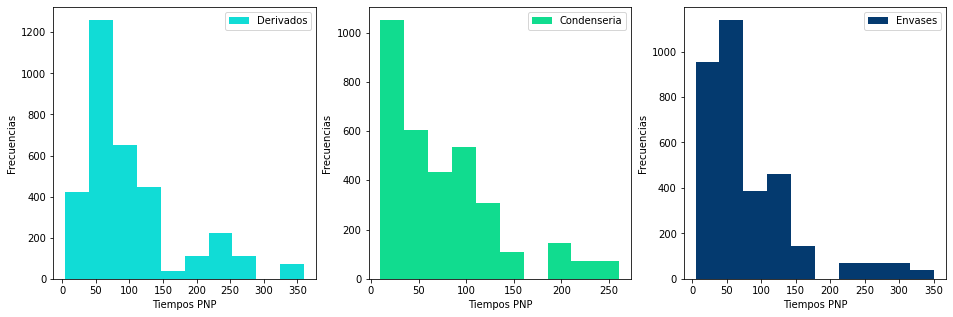

In [ ]:
plt.figure(figsize = (16,5))
plt.subplot(131)
plt.hist(data.query("Fabrica == 'Derivados'")['TiempoPNP'].values, color = '#11DCD6', label = 'Derivados')
plt.xlabel('Tiempos PNP')
plt.ylabel('Frecuencias')
plt.legend(loc = 'best')
plt.subplot(132)
plt.hist(data.query("Fabrica == 'Condenseria'")['TiempoPNP'].values, color = '#11DC8F', label = 'Condenseria')
plt.xlabel('Tiempos PNP')
plt.ylabel('Frecuencias')
plt.legend(loc = 'best')
plt.subplot(133)
plt.hist(data.query("Fabrica == 'Envases'")['TiempoPNP'].values,color ='#043A6F', label = 'Envases')
plt.xlabel('Tiempos PNP')
plt.ylabel('Frecuencias')
plt.legend(loc = 'best')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


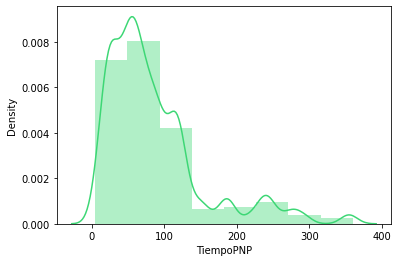

In [ ]:
import seaborn as sns
sns.distplot(data.TiempoPNP,bins = 8, kde= True, color = '#3DD775')
plt.show()

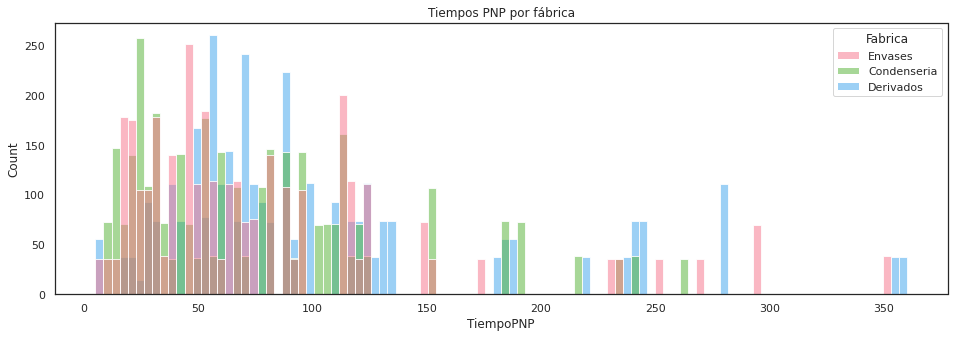

In [ ]:
plt.figure(figsize = (16,5))
sns.set_theme(style="white")
sns.histplot(data = data, x = 'TiempoPNP', hue = 'Fabrica', bins = 100, palette = 'husl')
plt.title('Tiempos PNP por fábrica')
plt.show()